<a href="https://colab.research.google.com/github/YiYiYi517/NYU_Integrated_Marketing/blob/main/%E2%80%9CHypothesisTesting_bankmarketing%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

**Install the Package Pandas and Numpy for the function of "TABLE" and "Math"**

In [ ]:
import pandas as pd
import numpy as np

**Read the marketing data from Github Url ("Read Raw")**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YiYiYi517/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/bank-additional-full.csv',sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**View the data information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Install the pingouin Package**

In [ ]:
pip install pingouin

**Import the pingouin package**

In [ ]:
import pingouin as pg

# Hypothesis Test

**One-Sample T-test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
x=df['age']
pg.ttest(x, 30)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning:

divide by zero encountered in double_scalars



,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,195.213215,41187,two-sided,0.0,"[39.92, 40.12]",0.961887,inf,1.0


In [ ]:
df['age'].mean()

40.02406040594348

**Two-Sample T-Test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
duration_housing = df[df['housing']=='yes']['duration']
duration_no_housing = df[df['housing']=='no']['duration']

In [ ]:
duration_housing.mean()

256.60321653689283

In [ ]:
duration_no_housing.mean()

260.6636773708517

In [ ]:
x=duration_housing
y=duration_no_housing
pg.ttest(x, y, paired=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.56523,39358.138853,two-sided,0.117537,"[-9.15, 1.02]",0.015654,0.038,0.346655


**One-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [ ]:
aov = pg.anova(dv='duration', between='education', data=df)
aov.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,education,7,41180,1.922,0.062,0.0


In [ ]:
df.groupby('education')['duration'].mean()

education
basic.4y               264.827826
basic.6y               264.414485
basic.9y               261.291811
high.school            260.886810
illiterate             276.777778
professional.course    252.533855
university.degree      253.223373
unknown                262.390526
Name: duration, dtype: float64

**Two-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [ ]:

aov = pg.anova(dv='duration', between=['education','job'], data=df)
aov.round(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 11, but rank is 7



,Source,SS,DF,MS,F,p-unc,np2
0,education,2.697855e+07,7.0,3854078.129,57.341,0.000,0.010
1,job,1.492369e+06,11.0,135669.909,2.018,0.049,0.001
2,education * job,4.696353e+06,77.0,60991.593,0.907,0.705,0.002
3,Residual,2.762330e+09,41098.0,67213.252,NaN,NaN,NaN


In [ ]:
df.groupby(['education','job'])['duration'].sum()

education  job         
basic.4y   admin.           22429
           blue-collar     611229
           entrepreneur     37665
           housemaid       115907
           management       26156
                            ...  
unknown    services         39235
           student          48731
           technician       54569
           unemployed        5450
           unknown          27421
Name: duration, Length: 90, dtype: int64

**Chi-Squared of Independence**

https://pingouin-stats.org/generated/pingouin.chi2_independence.html#pingouin.chi2_independence


In [ ]:
expected, observed, stats = pg.chi2_independence(df, x='loan',
                                                 y='y')

In [ ]:
expected

y,no,yes
loan,,
no,30125.390891,3824.609109
unknown,878.472371,111.527629
yes,5544.136739,703.863261


In [ ]:
observed

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [ ]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.094028,2.0,0.578675,0.005154,0.141129
1,cressie-read,0.666667,1.096757,2.0,0.577886,0.005160,0.141375
2,log-likelihood,0.000000,1.102265,2.0,0.576297,0.005173,0.141871
3,freeman-tukey,-0.500000,1.106439,2.0,0.575095,0.005183,0.142247
4,mod-log-likelihood,-1.000000,1.110651,2.0,0.573886,0.005193,0.142626
5,neyman,-2.000000,1.119188,2.0,0.571441,0.005213,0.143396


**Mann-Whitney U Test (= Wilcoxon rank-sum test)**

https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu

In [ ]:
duration_loan = df[df['loan']=='yes']['duration']
duration_no_loan = df[df['loan']=='no']['duration']

In [ ]:
df.groupby('loan')['duration'].median()

loan
no         181
unknown    169
yes        176
Name: duration, dtype: int64

In [ ]:
x=duration_loan
y=duration_no_loan
pg.mwu(x, y, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,104317135.0,two-sided,0.038704,0.016431,0.491785


#Paired Tests



**Import the data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/Q_GDP_Capita.csv')
df.head()

,LOCATION,Country,Measure,Frequency,TIME,Unit Code,Value
0,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2017-Q4,USD,50719.7
1,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q1,USD,51371.0
2,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q2,USD,52211.9
3,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q3,USD,52561.7
4,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q4,USD,53023.0


**Conduct the paired-t test to compare the GDP per capita for the first quarter of 2019 and 2020 for all countries**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
df_2019_Q2 = df[df.TIME=='2019-Q2'][['Country','Value','TIME']]
df_2019_Q2=df_2019_Q2.groupby(['Country','TIME']).max().reset_index()
df_2019_Q2=df_2019_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2019_Q2.head()

,Country,Value
0,Australia,54425.3
1,Austria,58827.2
2,Belgium,54675.1
3,Bulgaria,24488.9
4,Canada,51537.9


In [ ]:
df_2020_Q2 = df[df.TIME=='2020-Q2'][['Country','Value','TIME']]
df_2020_Q2=df_2020_Q2.groupby(['Country','TIME']).max().reset_index()
df_2020_Q2=df_2020_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2020_Q2.head()

,Country,Value
0,Australia,50912.7
1,Austria,50477.1
2,Belgium,47330.7
3,Bulgaria,22933.4
4,Canada,44462.8


In [ ]:
pre=df_2019_Q2['Value']
post=df_2020_Q2['Value']
from pingouin import ttest
ttest(pre, post, paired=True).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,12.69,38,two-sided,0.0,"[4161.4, 5740.57]",0.27,2.147e+12,0.38


In [ ]:
df_Figure = df[df.TIME.isin(['2019-Q2','2020-Q2'])][['Country','Value','TIME']].groupby(['Country','TIME']).max().reset_index()
import plotly.express as px
fig = px.bar(df_Figure, x="Country", y="Value",
             color='TIME', barmode='group',
             height=400)
fig.show()

Conduct the Wilcoxon Signed-rank test to compare probability of GDP per capita for the first quarter of 2019 is larger than 2020 or not for all countries



In [ ]:
### install the package
import pingouin as pg
pg.wilcoxon(pre, post, tail='two-sided')

,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,5.465166e-08,1.0,0.604208


# Assumption: Pearson or Spearman Test of Correlations

**Histogram and scatterplot**

In [ ]:
#install package
import seaborn as sns

In [ ]:
df_joint= df_2019_Q2.merge(df_2020_Q2, how='inner',on="Country")
df_joint.columns =['Country','2019_Q2','2020_Q2']
df_joint.head()

,Country,2019_Q2,2020_Q2
0,Australia,54425.3,50912.7
1,Austria,58827.2,50477.1
2,Belgium,54675.1,47330.7
3,Bulgaria,24488.9,22933.4
4,Canada,51537.9,44462.8


**draw scatter and histgram plot**

https://seaborn.pydata.org/generated/seaborn.jointplot.html

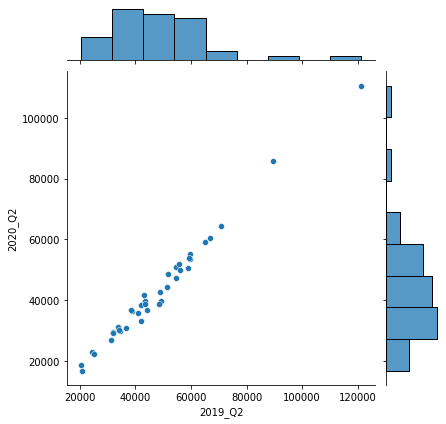

In [ ]:
#draw the plot
sns.jointplot(data=df_joint, x="2019_Q2", y="2020_Q2")

**Test for multivariate normality**

https://pingouin-stats.org/generated/pingouin.multivariate_normality.html

In [ ]:
X = df_joint[['2019_Q2', '2020_Q2']]
pg.multivariate_normality(X, alpha=.05)

HZResults(hz=0.7158322195020562, pval=0.11142774379515946, normal=True)

**We can't reject multivariate normality, so we will use pearson test for correlations**

https://pingouin-stats.org/generated/pingouin.corr.html#pingouin.corr

In [ ]:
x=df_joint['2019_Q2']
y=df_joint['2020_Q2']
pg.corr(x, y, method="pearson").round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,39,0.993,"[0.99, 1.0]",0.987,0.986,0.0,1.327e+32,1.0


#Power Analysis

**Power analysis for T-test**

https://pingouin-stats.org/generated/pingouin.power_ttest.html#pingouin.power_ttest


Note: For a paired T-test, the sample size n corresponds to the number of pairs. For an independent two-sample T-test with equal sample sizes, n corresponds to the sample size of each group (i.e. number of observations in one group).

In [ ]:
#install the package
from pingouin import power_ttest

d is the Cohen d effect size, Power is 1-Type II error, Alpha is the type I error

In [ ]:
### conduct the test
print('n: %.4f' % power_ttest(d=0.1, power=0.80, alpha=0.05))

n: 1570.7331


**Power analysis for ANOVA**

https://pingouin-stats.org/generated/pingouin.power_anova.html#pingouin.power_anova

In [ ]:
# install the package
from pingouin import power_anova

eta is the effect size for ANOVA (the level of correlation across catergories), k is the number of categories, Power is 1-Type II error, alpha is type I error

In [ ]:
### conduct the test
print('n: %.4f' % power_anova(eta=0.1, k=3, power=0.80, alpha=0.05))

n: 29.9255


**Power analysis for Chi-square Test**

https://pingouin-stats.org/generated/pingouin.power_chi2.html#pingouin.power_chi2

In [ ]:
# install the package
from pingouin import power_chi2

dof is the degress of freedom $=(r-1)*(c-1)$, where r is the number of rows in the expected frequency table and c is the nuber of columns in the expected frequency table. W is the effect size, which is the level of correlation. Power is 1-Type II error and Alpha is the type I error. 

In [ ]:
### conduct the test
print('n: %.4f' % power_chi2(dof=1, w=0.3, power=0.80, alpha=0.05))

n: 87.2096
